# **Total Runs and Wickets Prediction of Teams**
---

## **Importing libraries and setting up the data repository :**

In [111]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
df_deliveries = pd.read_csv('../csv_files/deliveries.csv')

In [113]:
df_deliveries.shape

(17380, 22)

In [114]:
df_deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [115]:
df_deliveries.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.6,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,1.1,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,1.2,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,1.3,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,1.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df_deliveries.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

### **Creation of Player-wise Dataset:**

The 'deliveries' dataset have the information match by match. For this task we need to predict the Total_runs scored and wickets taken by each player, so we're creating a new dataframe that focuses on individual player, which will help to analyze performance of players of various teams in different matches.

First of all we extract the 'Strikers', 'Non-striker' and 'Bowlers' of each team to get the teamwise list of players.  

In [117]:
all_players = set()

all_players.update(df_deliveries['striker'].unique())
all_players.update(df_deliveries['non_striker'].unique())
all_players.update(df_deliveries['bowler'].unique())

team_players = {team: {'striker': set(), 'non_striker': set(), 'bowler': set()} for team in df_deliveries['batting_team'].unique()}

for _, row in df_deliveries.iterrows():
    team = row['batting_team']
    team_players[team]['striker'].add(row['striker'])
    team_players[team]['non_striker'].add(row['non_striker'])
    team_players[team]['bowler'].add(row['bowler'])

for team, roles in team_players.items():
    print(f"Team: {team}")
    for role, players in roles.items():
        print(f"{role.capitalize()}s: {', '.join(players)}")


Team: England
Strikers: MM Ali, RJW Topley, HC Brook, DJ Malan, MA Wood, AAP Atkinson, BA Stokes, JC Buttler, CR Woakes, JE Root, SM Curran, DJ Willey, JM Bairstow, AU Rashid, LS Livingstone
Non_strikers: MM Ali, RJW Topley, HC Brook, DJ Malan, MA Wood, AAP Atkinson, BA Stokes, JC Buttler, CR Woakes, JE Root, SM Curran, DJ Willey, JM Bairstow, AU Rashid, LS Livingstone
Bowlers: R Ravindra, CBRLS Kumara, Azmatullah Omarzai, Mujeeb Ur Rahman, Mohammed Siraj, Mustafizur Rahman, KA Maharaj, M Theekshana, L Ngidi, Kuldeep Yadav, Mahedi Hasan, Rashid Khan, Naveen-ul-Haq, K Rabada, TA Boult, RA Jadeja, MJ Henry, JDS Neesham, MJ Santner, D Madushanka, Mehedi Hasan Miraz, Fazalhaq Farooqi, M Jansen, Mohammad Nabi, Mohammed Shami, Taskin Ahmed, CAK Rajitha, G Coetzee, Shakib Al Hasan, GD Phillips, DM de Silva, Shoriful Islam, JJ Bumrah, AD Mathews
Team: New Zealand
Strikers: MJ Santner, R Ravindra, LH Ferguson, JDS Neesham, DP Conway, GD Phillips, DJ Mitchell, TG Southee, KS Williamson, TA Boult

Then, we combine the lists of 'Strikers', 'Non-striker' and 'Bowlers' of each team and find the unique names of players because there will be instances where a player is listed both as a 'Striker' and 'Non-striker.'

In [118]:
team_players = {team: set() for team in df_deliveries['batting_team'].unique()}

for _, row in df_deliveries.iterrows():
    team = row['batting_team']
    team_players[team].add(row['striker'])
    team_players[team].add(row['non_striker'])
    
for _, row in df_deliveries.iterrows():
    team = row['bowling_team']
    team_players[team].add(row['bowler'])

for team, players in team_players.items():
    print(f"Team: {team}")
    print(f"Number of Players: {len(players)}")
    print(f"Players: {', '.join(players)}")


Team: England
Number of Players: 15
Players: MM Ali, RJW Topley, HC Brook, DJ Malan, MA Wood, AAP Atkinson, BA Stokes, JC Buttler, CR Woakes, JE Root, SM Curran, DJ Willey, JM Bairstow, AU Rashid, LS Livingstone
Team: New Zealand
Number of Players: 14
Players: MJ Santner, R Ravindra, LH Ferguson, JDS Neesham, DP Conway, GD Phillips, DJ Mitchell, TG Southee, KS Williamson, TA Boult, WA Young, MS Chapman, MJ Henry, TWM Latham
Team: Pakistan
Number of Players: 14
Players: Fakhar Zaman, Hasan Ali, Haris Rauf, Mohammad Rizwan, Mohammad Nawaz, Abdullah Shafique, Usama Mir, Mohammad Wasim, Shadab Khan, Iftikhar Ahmed, Saud Shakeel, Shaheen Shah Afridi, Babar Azam, Imam-ul-Haq
Team: Netherlands
Number of Players: 15
Players: SA Engelbrecht, BFW de Leede, PA van Meekeren, RE van der Merwe, A Dutt, MP O'Dowd, LV van Beek, W Barresi, Shariz Ahmad, SA Edwards, CN Ackermann, Saqib Zulfiqar, R Klein, Vikramjit Singh, AT Nidamanuru
Team: Afghanistan
Number of Players: 13
Players: Noor Ahmad, Rahmanul

In a World Cup team, there are usually 15 players, but in this dataset, number of players are less than or equal to 15 in most of the teams. This is because this dataset only includes the names of the players which are 'Strikers', 'Non-striker' or 'Bowlers'. So those players who haven't played as one of those (i.e fielder or extras), they are not listed here. 'Sri Lanka' team has more than 15 players because some players have been injured during the worldcup matches. So there are 18 unique player names in the list. 

In [119]:
df_deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [120]:
df_deliveries[['extras','wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type','other_player_dismissed']] = df_deliveries[['extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type','other_player_dismissed']].fillna(0)

We filled the missing values in the columns 'extras,' 'wides,' 'noballs,' 'byes,' 'legbyes,' 'penalty,' 'wicket_type,' 'player_dismissed,' 'other_wicket_type,' and 'other_player_dismissed' with zeros. This is because these events like wides, extras, wickets, no_ball may not happen at every ball, and zeros shows that these events did not occur at that ball.


Then, we created a new dataset that stores the information player-wise. We also included columns for 'Total_runs' and 'Total_wickets' to show the individual performance of each player in each match.

In [121]:
team_players = {team: set() for team in df_deliveries['batting_team'].unique()}

for _, row in df_deliveries.iterrows():
    team = row['batting_team']
    team_players[team].add(row['striker'])
    team_players[team].add(row['non_striker'])

    team = row['bowling_team']
    team_players[team].add(row['bowler'])

player_wise_data = []

for _, match in df_deliveries.iterrows():
    match_id = match['match_id']
    season = match['season']
    start_date = match['start_date']
    venue = match['venue']
    batting_team = match['batting_team']
    bowling_team = match['bowling_team']

    batting_players = team_players[batting_team]
    bowling_players = team_players[bowling_team]

    batting_runs = df_deliveries[(df_deliveries['match_id'] == match_id) &
                              (df_deliveries['striker'].isin(batting_players))].groupby('striker')['runs_off_bat'].sum().reset_index()

    batting_data = [{'match_id': match_id,
                     'season': season,
                     'start_date': start_date,
                     'venue': venue,
                     'team': batting_team,
                     'player': player,
                     'runs': batting_runs[batting_runs['striker'] == player]['runs_off_bat'].values[0] if player in batting_runs['striker'].tolist() else 0,
                     'wickets': 0} for player in batting_players]

    bowling_wickets = df_deliveries[(df_deliveries['match_id'] == match_id) &
                              (df_deliveries['bowler'].isin(bowling_players)) & df_deliveries['wicket_type'].isin(['bowled', 'caught', 'caught and bowled', 'lbw', 'stumped'])].groupby('bowler')['wicket_type'].count().reset_index()

    bowling_data = [{'match_id': match_id,
                     'season': season,
                     'start_date': start_date,
                     'venue': venue,
                     'team': bowling_team,
                     'player': player,
                     'runs': 0,
                     'wickets': bowling_wickets[bowling_wickets['bowler'] == player]['wicket_type'].values[0] if player in bowling_wickets['bowler'].tolist() else 0,} for player in bowling_players]

    player_wise_data.extend(batting_data)
    player_wise_data.extend(bowling_data)

player_wise_df = pd.DataFrame(player_wise_data)


In [122]:
player_wise_df = player_wise_df.drop_duplicates(keep='first')

In [123]:
player_wise_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'team', 'player', 'runs',
       'wickets'],
      dtype='object')

In [124]:
player_wise_df['total_runs'] = player_wise_df.groupby(['match_id', 'season', 'start_date', 'venue', 'team', 'player'])['runs'].transform('sum')
player_wise_df['total_wickets'] = player_wise_df.groupby(['match_id', 'season', 'start_date', 'venue', 'team', 'player'])['wickets'].transform('sum')

In [125]:
player_wise_df.shape

(1576, 10)

In [126]:
player_wise_df = player_wise_df.drop(['runs', 'wickets'], axis=1).reset_index(drop=True)

In [127]:
player_wise_df = player_wise_df.drop_duplicates(keep='first')

In [128]:
player_wise_df.to_csv('../csv_files/playerwise_df.csv')

In [129]:
player_wise_df.shape

(932, 8)

In [130]:
player_wise_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'team', 'player',
       'total_runs', 'total_wickets'],
      dtype='object')

In [131]:
player_wise_df.head(20)

,match_id,season,start_date,venue,team,player,total_runs,total_wickets
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,MM Ali,11,0
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,RJW Topley,0,0
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,HC Brook,25,0
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,DJ Malan,14,0
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,MA Wood,13,0
5,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,AAP Atkinson,0,0
6,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,BA Stokes,0,0
7,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,JC Buttler,43,0
8,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,CR Woakes,11,0
9,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",England,JE Root,77,0


In [132]:
player_wise_df.dtypes

match_id          int64
season           object
start_date       object
venue            object
team             object
player           object
total_runs        int64
total_wickets     int64
dtype: object

In [133]:
player_wise_df.describe()

,match_id,total_runs,total_wickets
count,932.000000,932.000000,932.000000
mean,16.494635,16.694206,0.503219
std,9.234327,27.214465,0.969453
min,1.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000
50%,17.000000,4.000000,0.000000
75%,25.000000,21.000000,1.000000
max,32.000000,174.000000,5.000000


In [134]:
categorical_col = [col for col in player_wise_df if player_wise_df[col].dtype == 'object']
categorical_col

['season', 'start_date', 'venue', 'team', 'player']

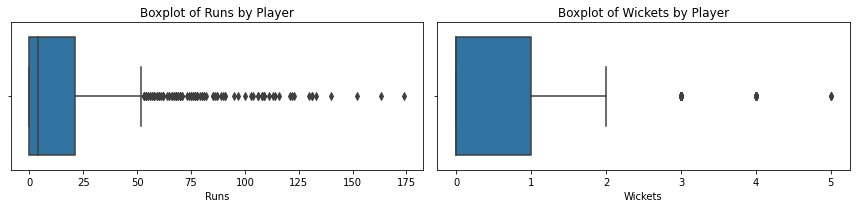

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

sns.boxplot(x='total_runs', data=player_wise_df, ax=axes[0])
axes[0].set_title('Boxplot of Runs by Player')
axes[0].set_xlabel('Runs')

sns.boxplot(x='total_wickets', data=player_wise_df, ax=axes[1])
axes[1].set_title('Boxplot of Wickets by Player')
axes[1].set_xlabel('Wickets')

plt.tight_layout()
plt.show()

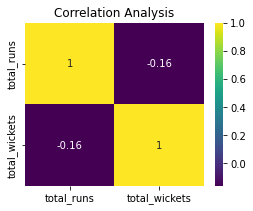

In [136]:
plt.figure(figsize=(4, 3))
sns.heatmap(player_wise_df[['total_runs', 'total_wickets']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Analysis')
plt.show()

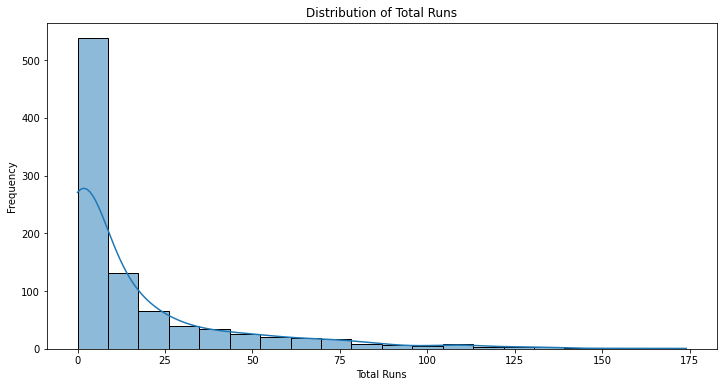

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(player_wise_df['total_runs'], bins=20, kde=True)
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

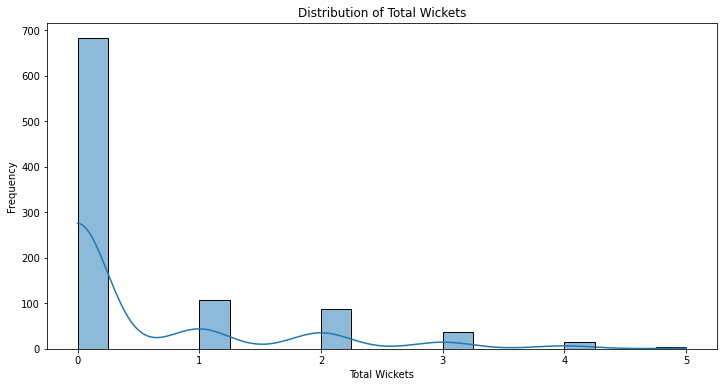

In [138]:
plt.figure(figsize=(12, 6))
sns.histplot(player_wise_df['total_wickets'], bins=20, kde=True)
plt.title('Distribution of Total Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Frequency')
plt.show()


In [139]:
top_run_scorer = player_wise_df.groupby(['player'])['total_runs'].sum().reset_index()
top_run_scorer = top_run_scorer.sort_values(by='total_runs', ascending=False)
print(top_run_scorer)

          player  total_runs
104    Q de Kock         545
107   R Ravindra         415
22     DA Warner         413
110    RG Sharma         398
4     AK Markram         362
..           ...         ...
105     R Ashwin           0
5       AT Carey           0
141    Usama Mir           0
99    Noor Ahmad           0
62   LB Williams           0

[146 rows x 2 columns]


In [140]:
top_wicket_taker = player_wise_df.groupby(['player'])['total_wickets'].sum().reset_index()
top_wicket_taker = top_wicket_taker.sort_values(by='total_wickets', ascending=False)
print(top_wicket_taker)

                  player  total_wickets
127  Shaheen Shah Afridi             16
67              M Jansen             16
1                A Zampa             16
77            MJ Santner             14
51             JJ Bumrah             14
..                   ...            ...
52           JM Bairstow              0
48            JC Buttler              0
47          Ishan Kishan              0
46           Imam-ul-Haq              0
145             WA Young              0

[146 rows x 2 columns]


In [141]:
total_team_runs_by_player = player_wise_df.groupby(['team', 'player'])['total_runs'].sum().reset_index()
total_team_runs_by_player

,team,player,total_runs
0,Afghanistan,Azmatullah Omarzai,203
1,Afghanistan,Fazalhaq Farooqi,2
2,Afghanistan,Hashmatullah Shahidi,226
3,Afghanistan,Ibrahim Zadran,212
4,Afghanistan,Ikram Alikhil,77
...,...,...,...
141,Sri Lanka,MD Shanaka,80
142,Sri Lanka,MDKJ Perera,94
143,Sri Lanka,P Nissanka,289
144,Sri Lanka,PVD Chameera,1


In [142]:
total_team_wickets_by_player = player_wise_df.groupby(['team', 'player'])['total_wickets'].sum().reset_index()
total_team_wickets_by_player

,team,player,total_wickets
0,Afghanistan,Azmatullah Omarzai,5
1,Afghanistan,Fazalhaq Farooqi,6
2,Afghanistan,Hashmatullah Shahidi,0
3,Afghanistan,Ibrahim Zadran,0
4,Afghanistan,Ikram Alikhil,0
...,...,...,...
141,Sri Lanka,MD Shanaka,0
142,Sri Lanka,MDKJ Perera,0
143,Sri Lanka,P Nissanka,0
144,Sri Lanka,PVD Chameera,0


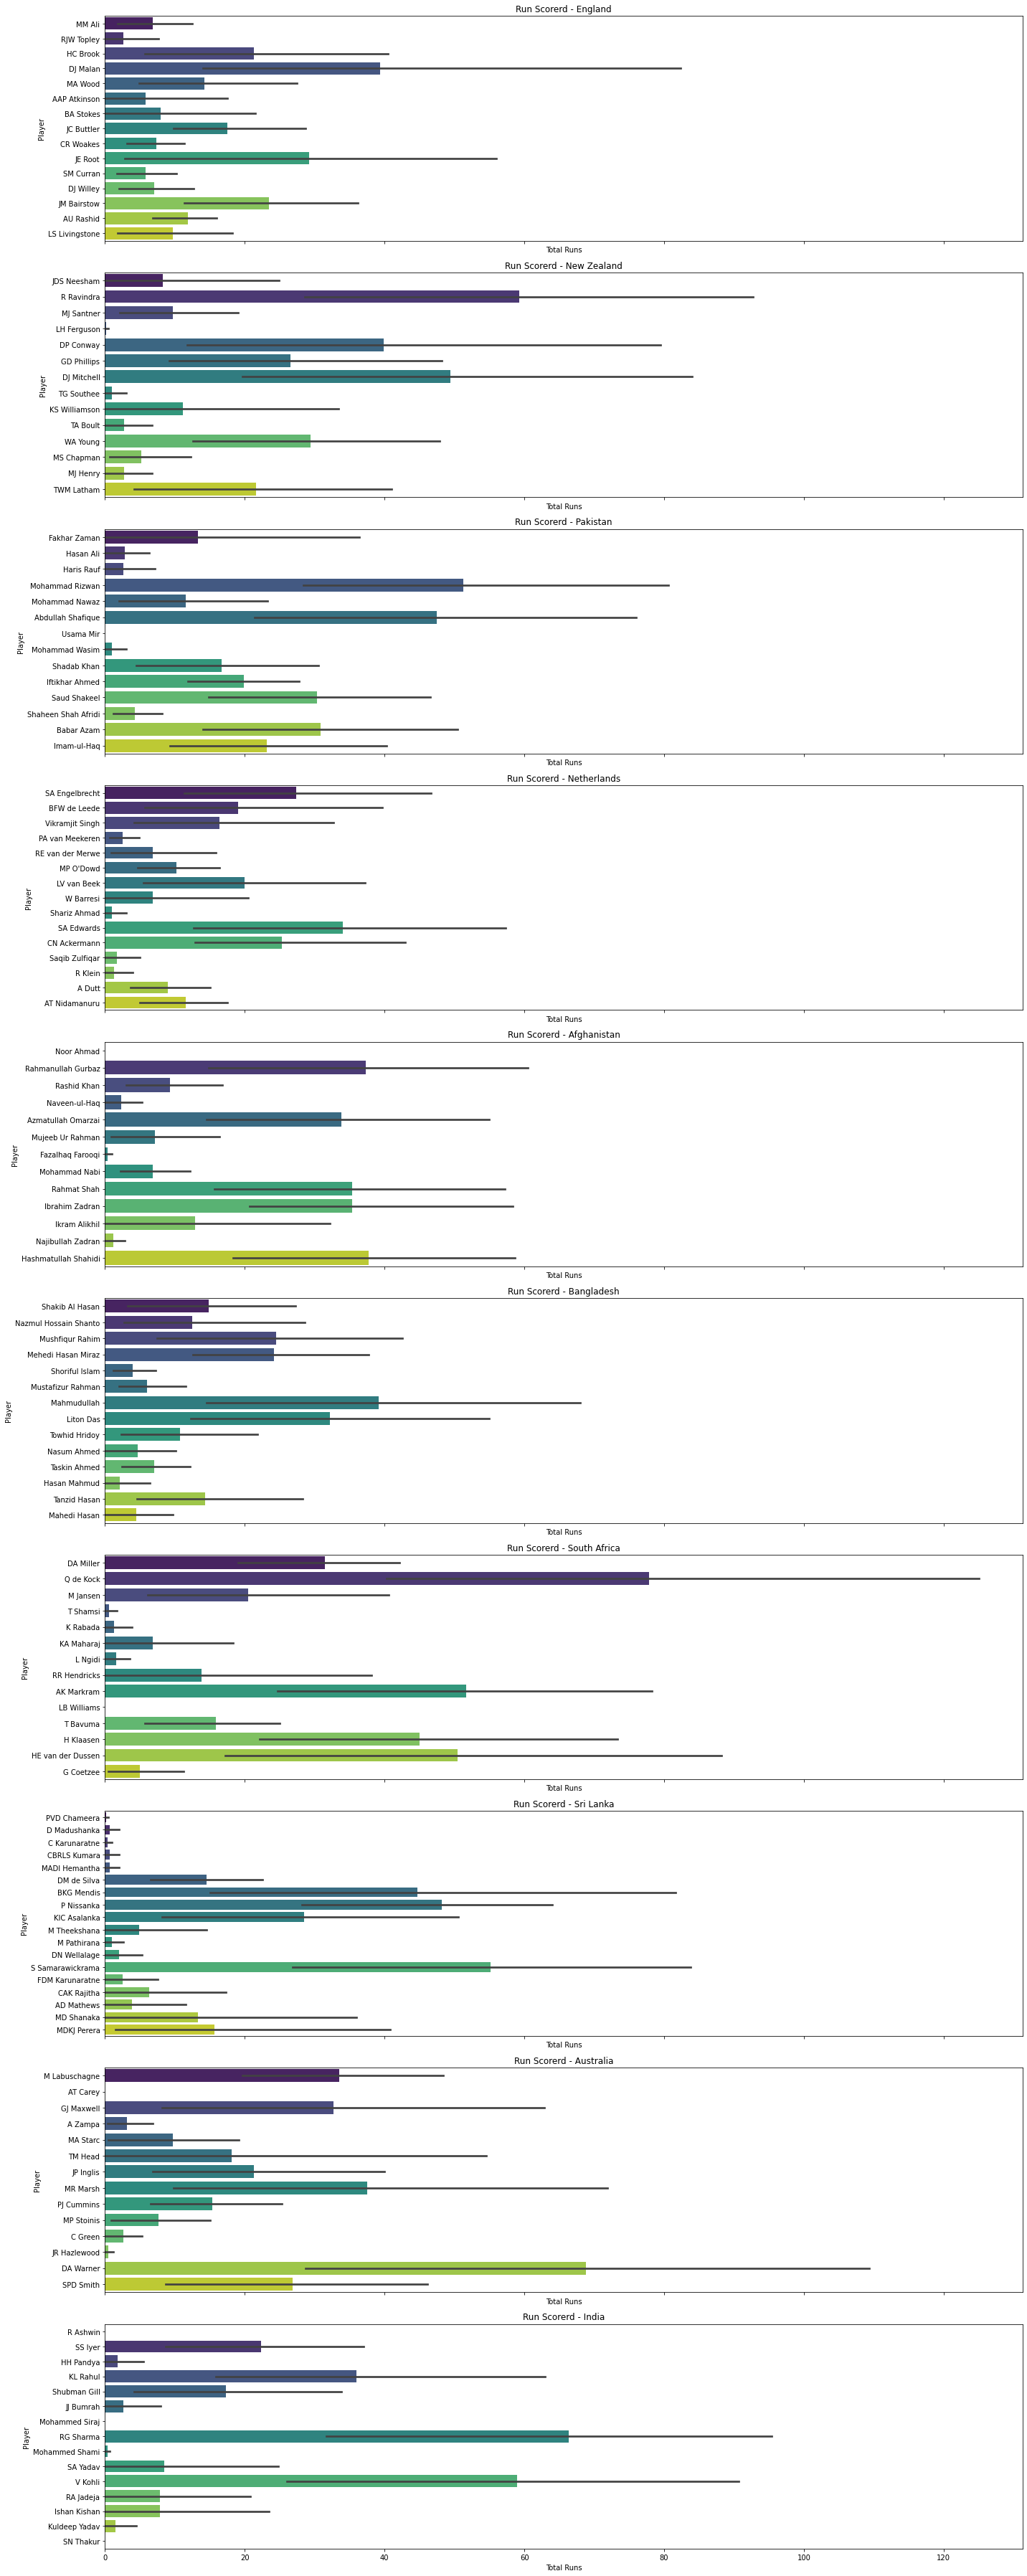

In [143]:
teams = player_wise_df['team'].unique()

fig, axes = plt.subplots(len(teams), 1, figsize=(20, 5 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    team_data = player_wise_df[player_wise_df['team'] == team]
    sns.barplot(ax=axes[i], x='total_runs', y='player', data=team_data, palette='viridis')
    axes[i].set_title(f'Run Scorerd - {team}')
    axes[i].set_xlabel('Total Runs')
    axes[i].set_ylabel('Player')

plt.tight_layout()
plt.show()


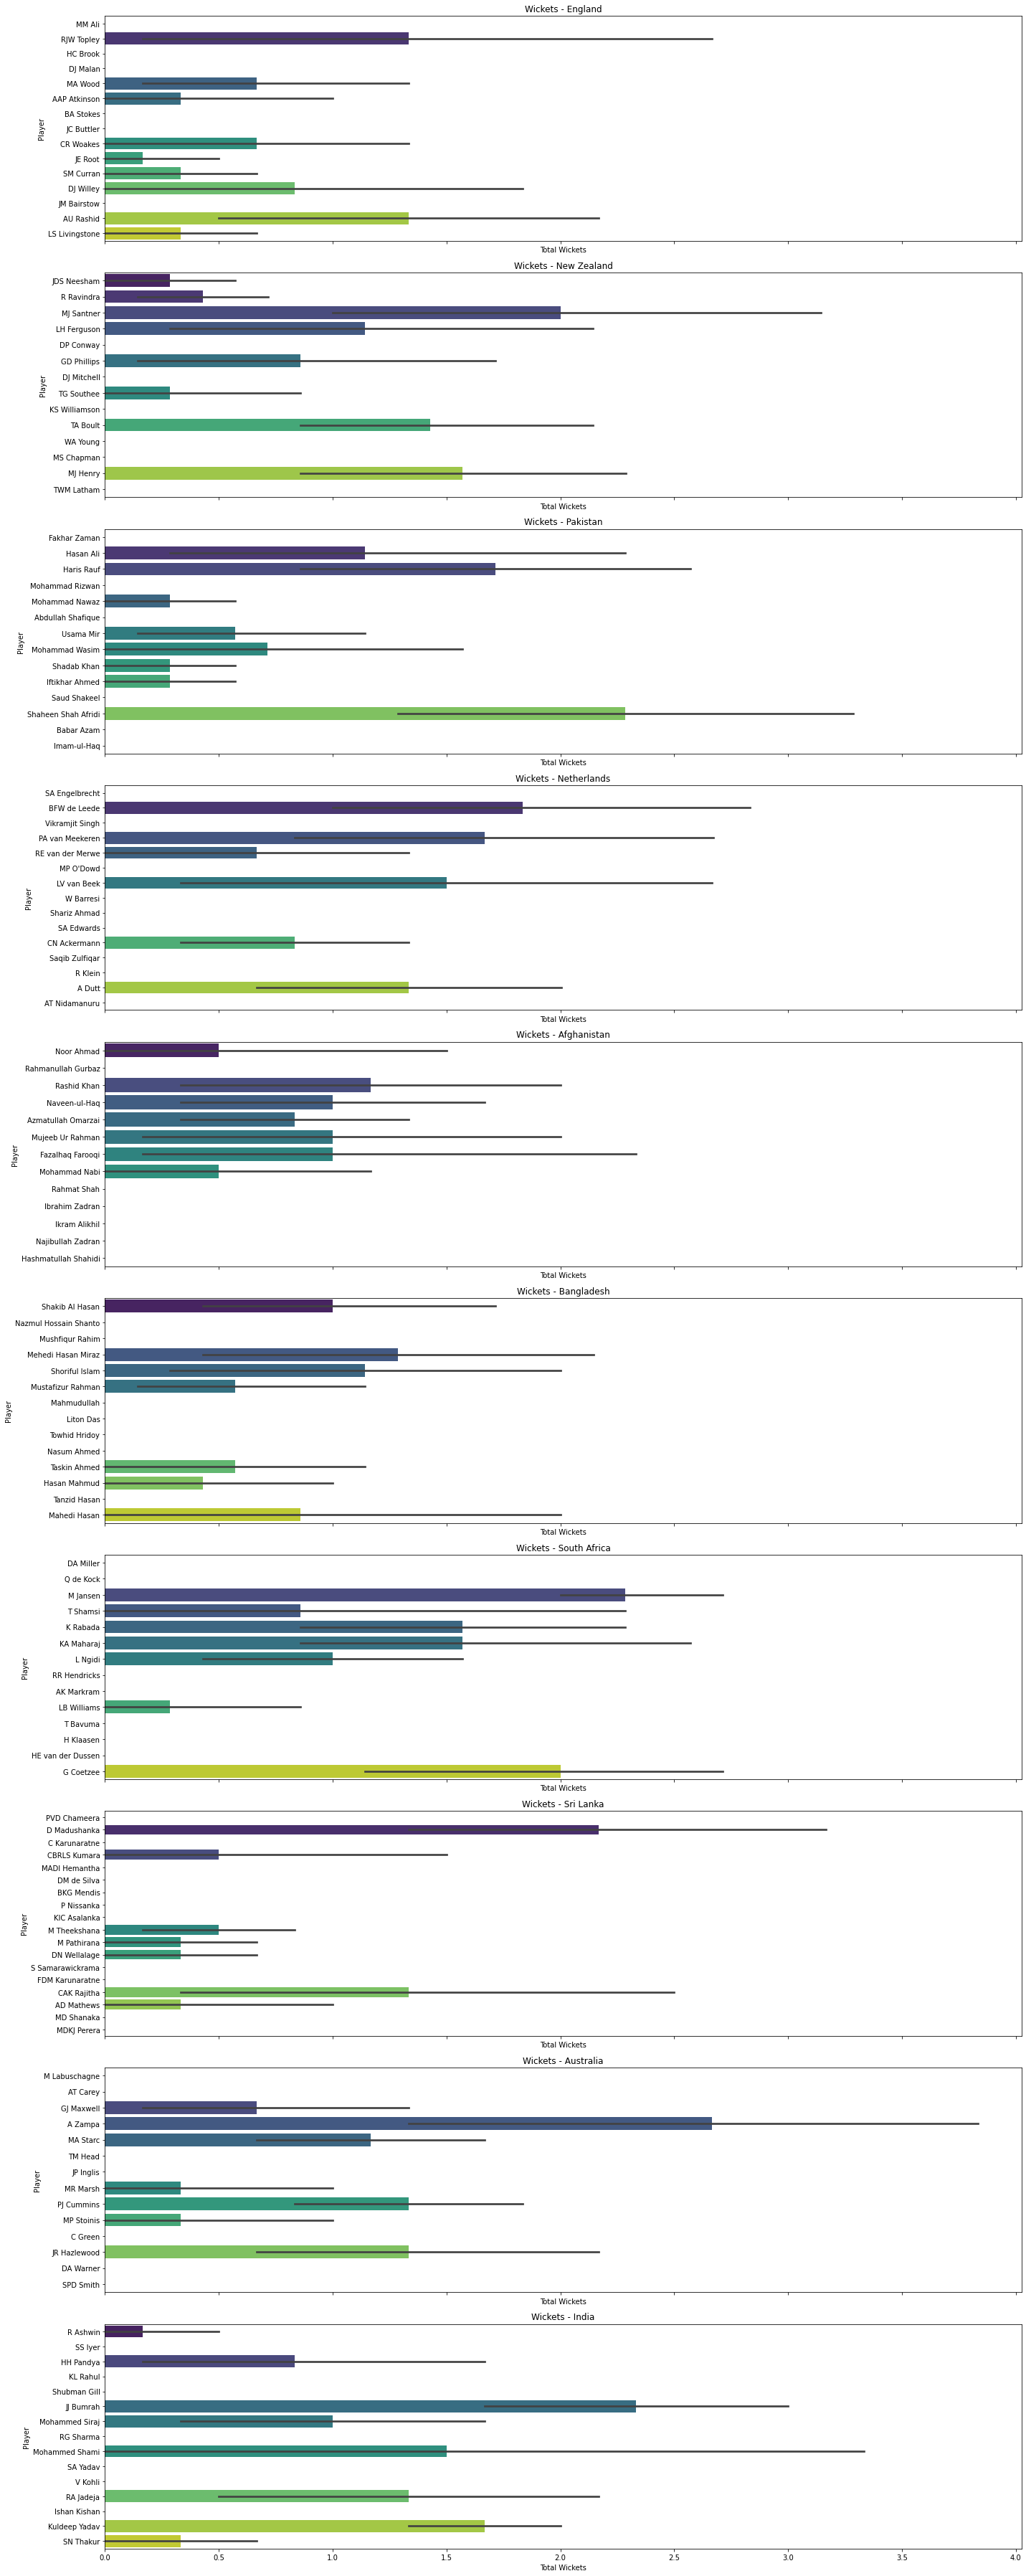

In [144]:
teams = player_wise_df['team'].unique()

fig, axes = plt.subplots(len(teams), 1, figsize=(20, 5 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    team_data = player_wise_df[player_wise_df['team'] == team]
    sns.barplot(ax=axes[i], x='total_wickets', y='player', data=team_data, palette='viridis')
    axes[i].set_title(f'Wickets - {team}')
    axes[i].set_xlabel('Total Wickets')
    axes[i].set_ylabel('Player')

plt.tight_layout()
plt.show()


# **Label Encoding :**

In [145]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [146]:
mapping = {}

for column in categorical_col:
    player_wise_df[column] = le.fit_transform(player_wise_df[column])
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [147]:
for column_name in categorical_col:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()

Mapping for column "season":
2023/24: 0

Mapping for column "start_date":
2023-10-05: 0
2023-10-06: 1
2023-10-07: 2
2023-10-08: 3
2023-10-09: 4
2023-10-10: 5
2023-10-11: 6
2023-10-12: 7
2023-10-13: 8
2023-10-14: 9
2023-10-15: 10
2023-10-16: 11
2023-10-17: 12
2023-10-18: 13
2023-10-19: 14
2023-10-20: 15
2023-10-21: 16
2023-10-22: 17
2023-10-23: 18
2023-10-24: 19
2023-10-25: 20
2023-10-26: 21
2023-10-27: 22
2023-10-28: 23
2023-10-29: 24
2023-10-30: 25
2023-10-31: 26
2023-11-01: 27

Mapping for column "venue":
Arun Jaitley Stadium, Delhi: 0
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow: 1
Eden Gardens, Kolkata: 2
Himachal Pradesh Cricket Association Stadium, Dharamsala: 3
M Chinnaswamy Stadium, Bengaluru: 4
MA Chidambaram Stadium, Chepauk, Chennai: 5
Maharashtra Cricket Association Stadium, Pune: 6
Narendra Modi Stadium, Ahmedabad: 7
Rajiv Gandhi International Stadium, Uppal, Hyderabad: 8
Wankhede Stadium, Mumbai: 9

Mapping for column "team":
Afghanistan: 0
Austra

### **Model Tarining and Testing :**

In [148]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor


In [149]:
X = player_wise_df[['match_id', 'season', 'start_date', 'venue', 'team', 'player']]
y = player_wise_df[['total_runs', 'total_wickets']]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True)

In [151]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}},
    'PolynomialFeatures': {"model": make_pipeline(PolynomialFeatures(), LinearRegression()),
                      "params": {'polynomialfeatures__degree': [2,3]}}
}


In [152]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train, y_train)
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
        train_mae = mean_absolute_error(y_train, y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
        test_mae = mean_absolute_error(y_test, y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model_ours)
    y_predicted = best_reg_model_ours.predict(X_test)

    return model_results,best_reg_model_ours

In [153]:
model_results,best_reg_model_ours = eval_models()
model_results

LinearRegression 19.996124016277523 {}
RandomForestRegressor 16.766573039699384 {'max_depth': 5, 'n_estimators': 30}
XGBRegressor 12.447989996403633 {'learning_rate': 0.01, 'n_estimators': 410}
PolynomialFeatures 19.857803766868834 {'polynomialfeatures__degree': 2}
Best model:  RandomForestRegressor(max_depth=5, n_estimators=30, random_state=42)


,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,19.996124,15.8853,10.357717,9.130718,{}
RandomForestRegressor,16.766573,15.46037,8.636148,8.598148,"{'max_depth': 5, 'n_estimators': 30}"
XGBRegressor,12.44799,16.681215,6.257989,8.738678,"{'learning_rate': 0.01, 'n_estimators': 410}"
PolynomialFeatures,19.857804,15.975615,10.271473,8.965153,{'polynomialfeatures__degree': 2}


In [154]:
print(best_reg_model_ours)

RandomForestRegressor(max_depth=5, n_estimators=30, random_state=42)


In [155]:
y_predicted = best_reg_model_ours.predict(X_test)

In [156]:
X_test.head(73)

,match_id,season,start_date,venue,team,player
205,5,0,3,5,1,80
1402,29,0,24,1,3,23
207,5,0,3,5,1,54
1409,29,0,24,1,3,120
956,21,0,17,3,4,123
...,...,...,...,...,...,...
442,11,0,8,5,2,93
96,3,0,2,3,0,99
1250,26,0,22,5,8,67
15,1,0,0,7,6,49


In [159]:
print(y_predicted)

[[16.93369506  0.42435967]
 [41.1450172   0.45963778]
 [21.02411967  0.43890476]
 [13.36267801  0.38739319]
 [14.46376306  0.41709752]
 [15.54980329  0.4640365 ]
 [19.56993758  0.46522059]
 [13.54578072  0.41618776]
 [21.34693478  0.4180887 ]
 [11.66415624  0.60308481]
 [14.53582406  0.43883004]
 [12.67200525  0.445859  ]
 [12.03599917  0.41059542]
 [12.19069293  0.61218587]
 [33.55312918  0.28945721]
 [20.12311124  0.55878412]
 [ 9.18105349  0.73487056]
 [11.98609997  0.61008455]
 [22.13239914  0.45581175]
 [18.05199121  0.49112319]
 [17.61701441  0.4483833 ]
 [36.15252938  0.40714376]
 [18.54021955  0.60514001]
 [ 8.69381963  0.67466908]
 [26.5008088   0.46547808]
 [19.90595485  0.4446363 ]
 [10.84711158  0.67528539]
 [20.58529884  0.37425764]
 [33.06717745  0.32916181]
 [10.69999042  0.35760749]
 [14.48988862  0.5769528 ]
 [23.32586142  0.36820715]
 [13.42293451  0.54999774]
 [13.35081436  0.58318639]
 [17.08532367  0.58862301]
 [24.28193106  0.35348246]
 [ 8.46933818  0.70504165]
 

In [158]:
import pickle
pickle_rfc = open("../pickle_files/runs_wickets_prediction.pkl","wb")
pickle.dump(best_reg_model_ours, pickle_rfc)
pickle_rfc.close()